In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('US_Accidents.csv', nrows=1000)


In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
print(df.isnull().sum())

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  1000
End_Lng                  1000
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           1
Temperature(F)              1
Wind_Chill(F)             540
Humidity(%)                 1
Pressure(in)                1
Visibility(mi)              3
Wind_Direction              1
Wind_Speed(mph)            47
Precipitation(in)         813
Weather_Condition           2
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

In [5]:
# df=df.dropna(subset=['City','Sunrise_Sunset',
#        'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [6]:
# Forward fill for 'Weather_Timestamp'
df['Weather_Timestamp'].fillna(method='ffill', inplace=True)

# Mean for numerical columns
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean(), inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace=True)

# Median for visibility
df['Visibility(mi)'].fillna(df['Visibility(mi)'].median(), inplace=True)

# Mode for categorical columns
df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0], inplace=True)
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)

# Fill Precipitation with 0.0
df['Precipitation(in)'].fillna(0.0, inplace=True)

# Verify that there are no more missing values
missing_values_count = df.isnull().sum()
print(missing_values_count[missing_values_count > 0])


End_Lat    1000
End_Lng    1000
dtype: int64


C:\Users\prash\AppData\Local\Temp\ipykernel_15552\1413753240.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Weather_Timestamp'].fillna(method='ffill', inplace=True)


In [7]:
df.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  1000
End_Lng                  1000
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

In [8]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1000.000000,1000.000000,1000.000000,0.0,0.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.371000,39.421341,-93.953647,NaN,NaN,0.034350,48.934034,23.368696,66.670671,29.976907,7.983500,9.841448,0.004060
std,0.491529,1.015623,17.071844,NaN,NaN,0.287393,21.347295,7.590769,24.624602,0.238913,3.318287,4.695622,0.020197
min,1.000000,36.609657,-123.354477,NaN,NaN,0.000000,3.900000,-8.400000,10.000000,28.620000,0.200000,1.200000,0.000000
25%,2.000000,38.720144,-121.225897,NaN,NaN,0.000000,32.000000,23.368696,49.000000,29.870000,6.000000,6.900000,0.000000
50%,2.000000,39.758961,-84.184639,NaN,NaN,0.010000,47.200000,23.368696,70.000000,30.010000,10.000000,9.200000,0.000000
75%,3.000000,39.953082,-83.032806,NaN,NaN,0.010000,64.000000,24.500000,89.000000,30.090000,10.000000,11.500000,0.000000
max,4.000000,41.428753,-81.550728,NaN,NaN,7.070000,99.000000,66.000000,100.000000,30.620000,30.000000,31.100000,0.220000


In [10]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek

In [11]:
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60  # Duration in minutes

In [12]:
df = pd.get_dummies(df, columns=['Weather_Condition', 'Wind_Direction', 'State', 'City'], drop_first=True)


In [13]:
twilight_conditions = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for condition in twilight_conditions:
    df[condition] = df[condition].apply(lambda x: 1 if x == 'Day' or x == 'Dawn' else 0)

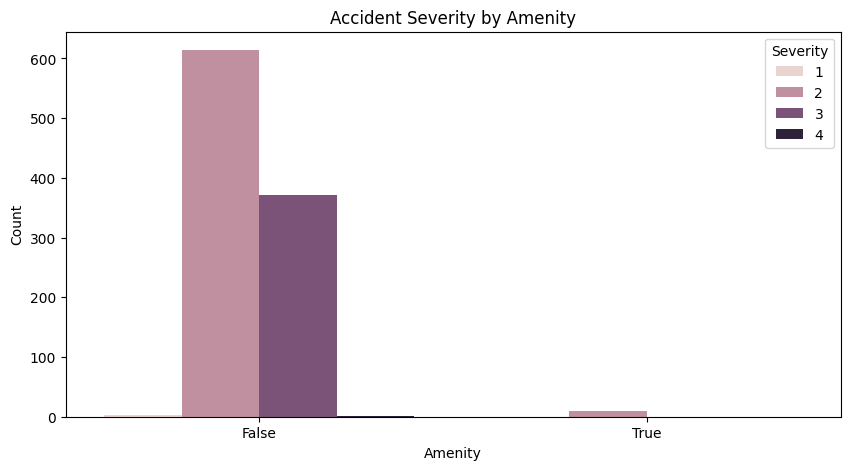

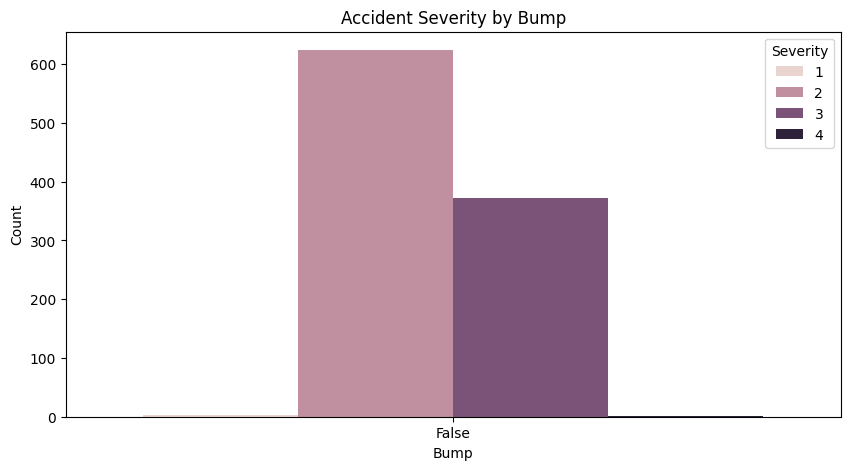

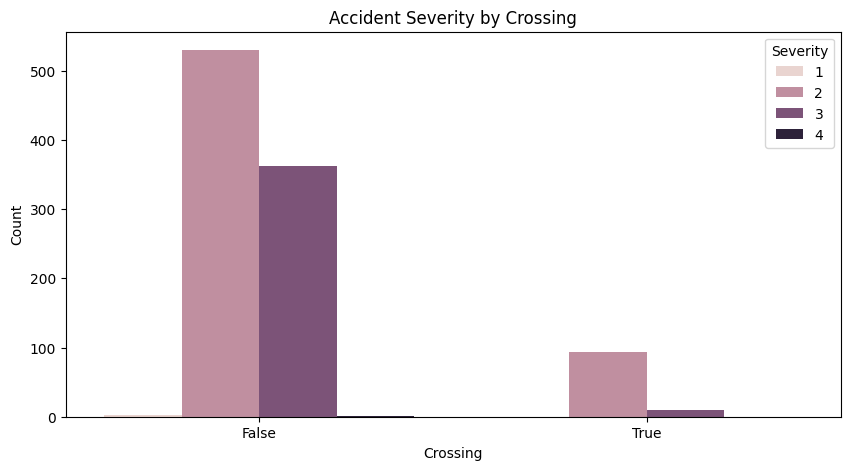

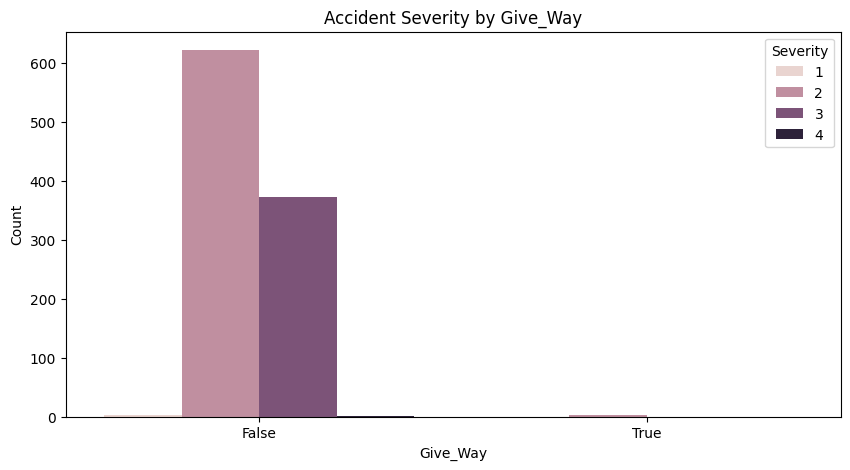

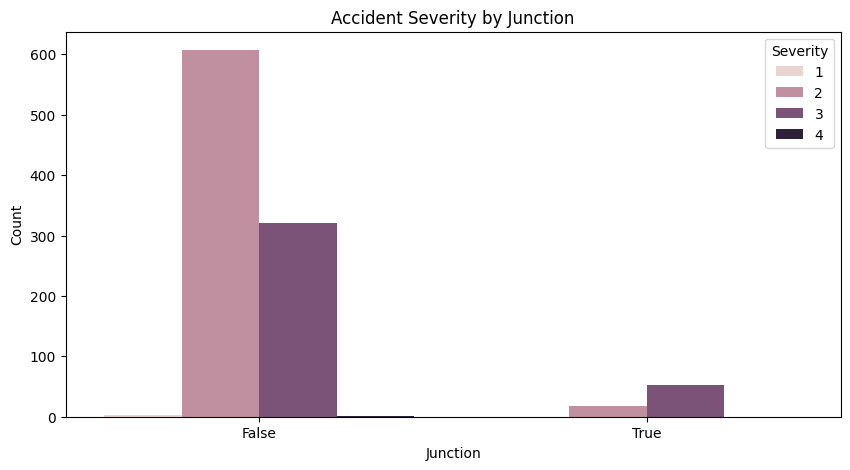

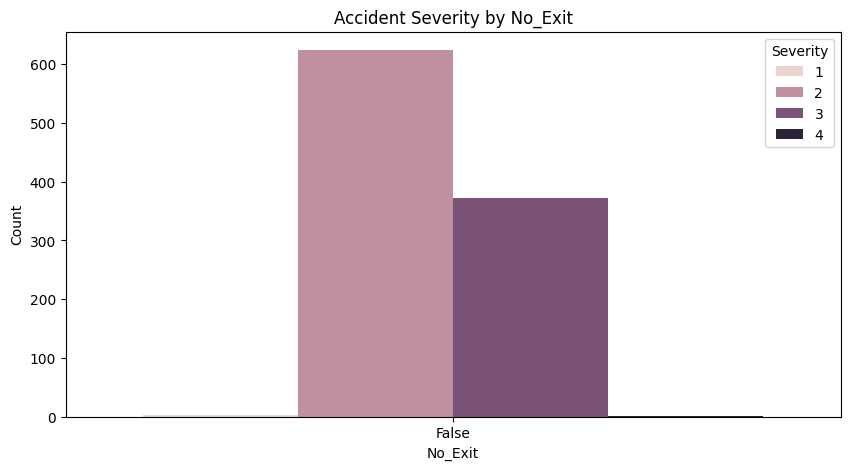

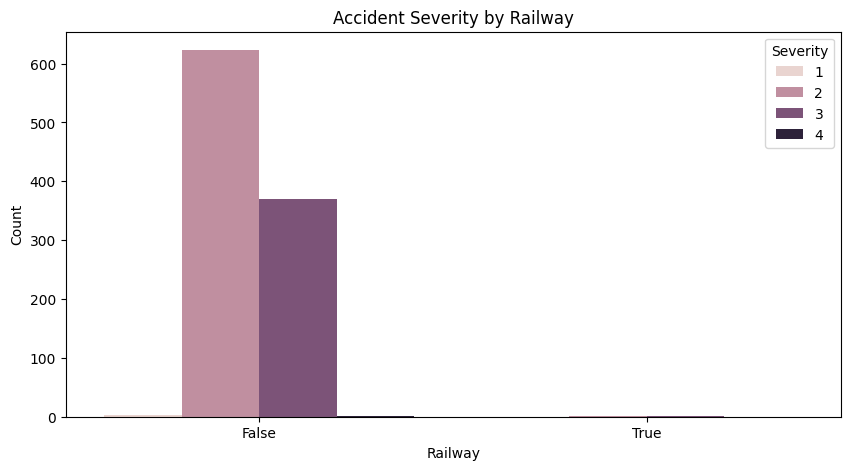

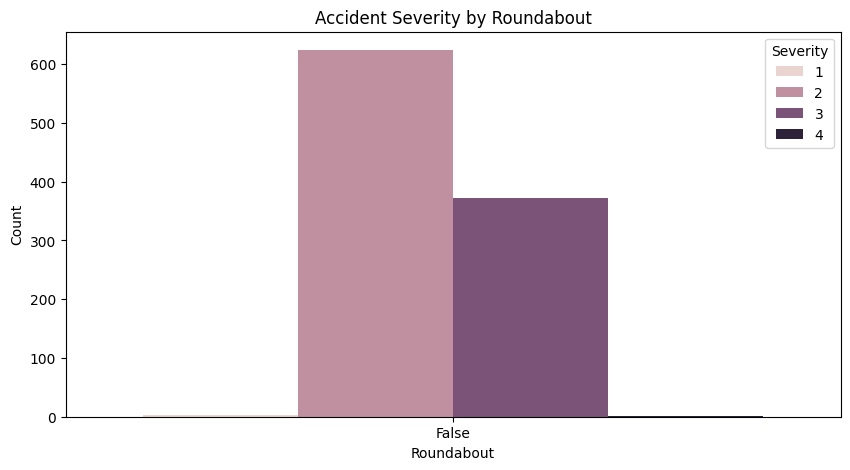

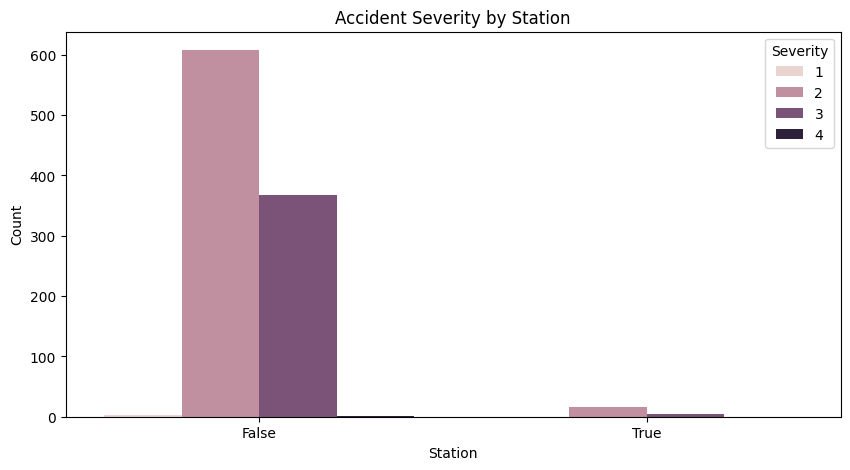

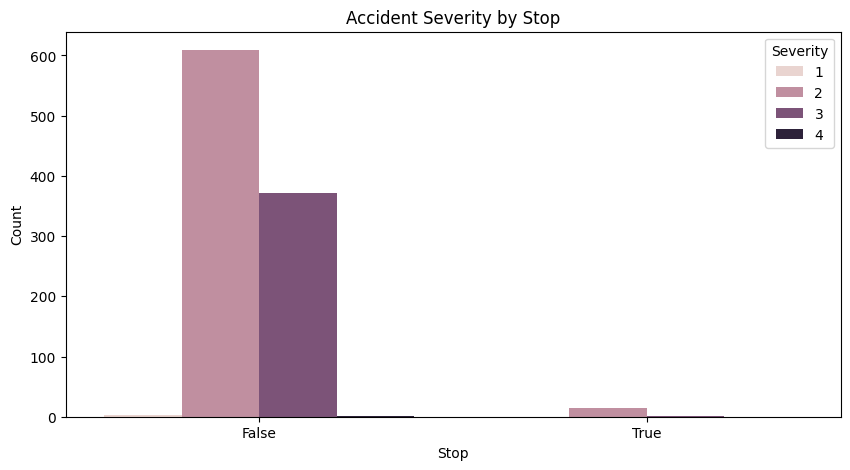

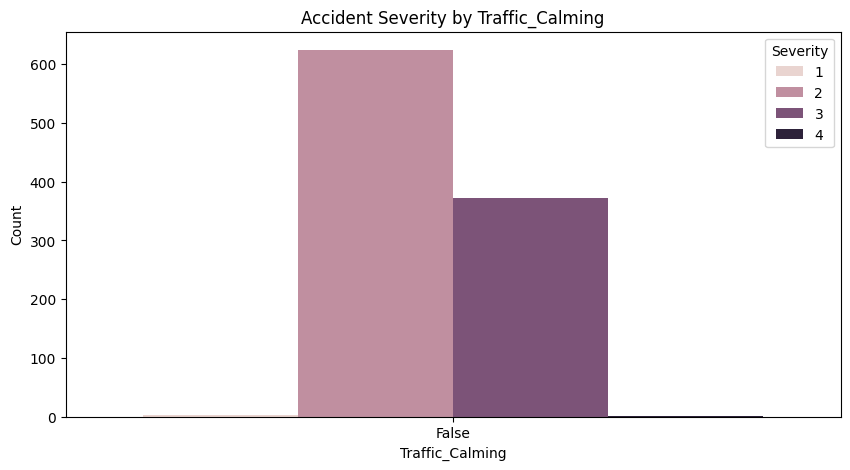

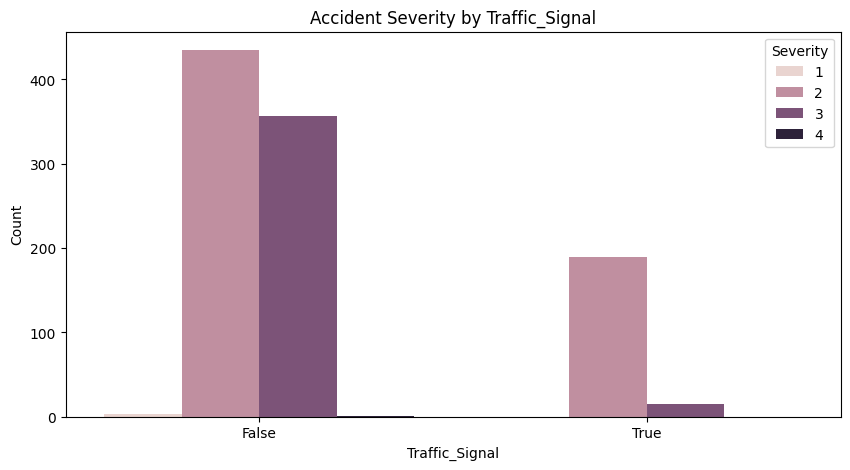

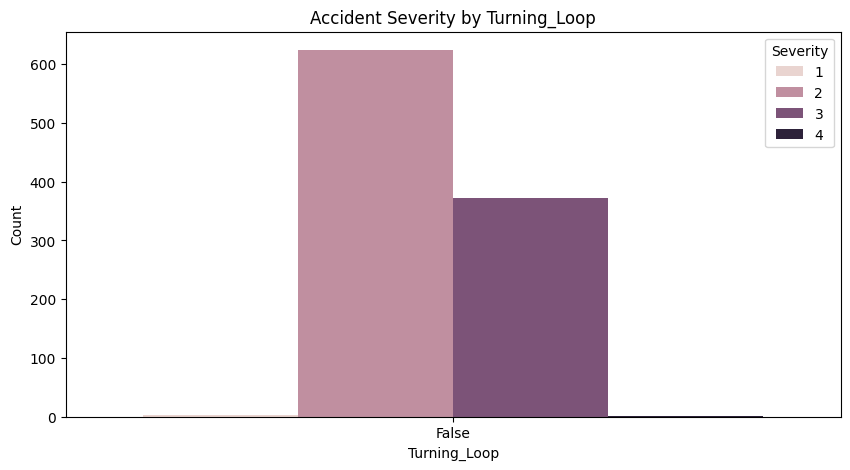

In [14]:
road_conditions = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

for condition in road_conditions:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=condition, hue='Severity', data=df)
    plt.title(f'Accident Severity by {condition}')
    plt.xlabel(condition)
    plt.ylabel('Count')
    plt.show()

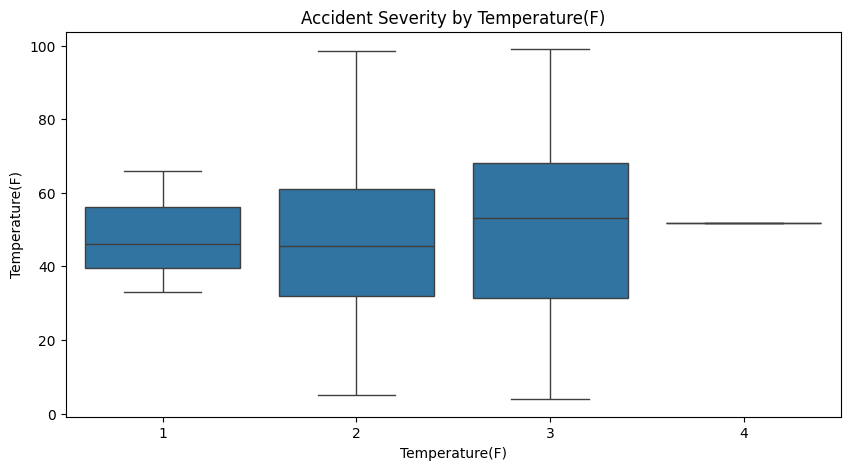

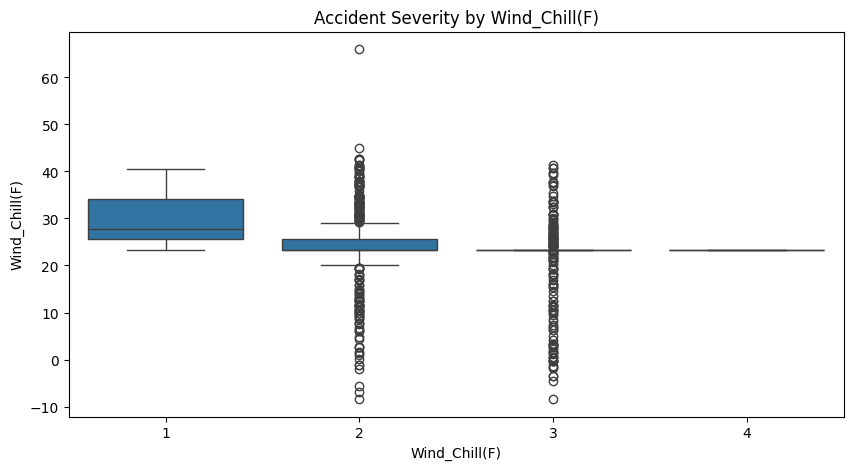

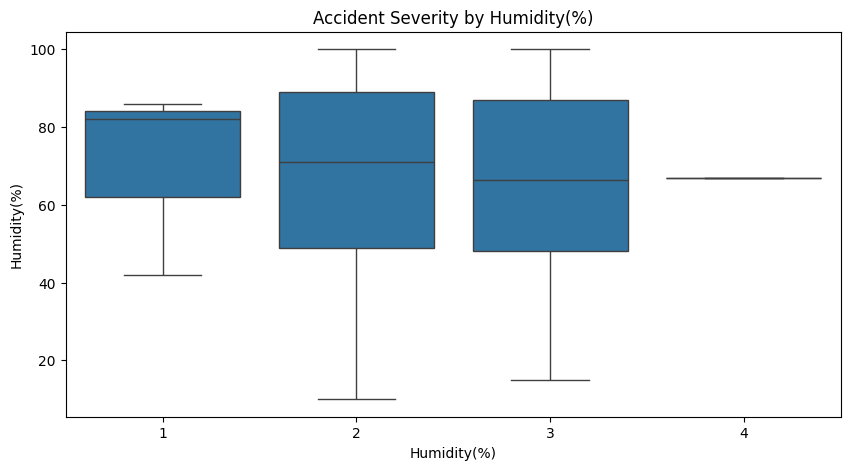

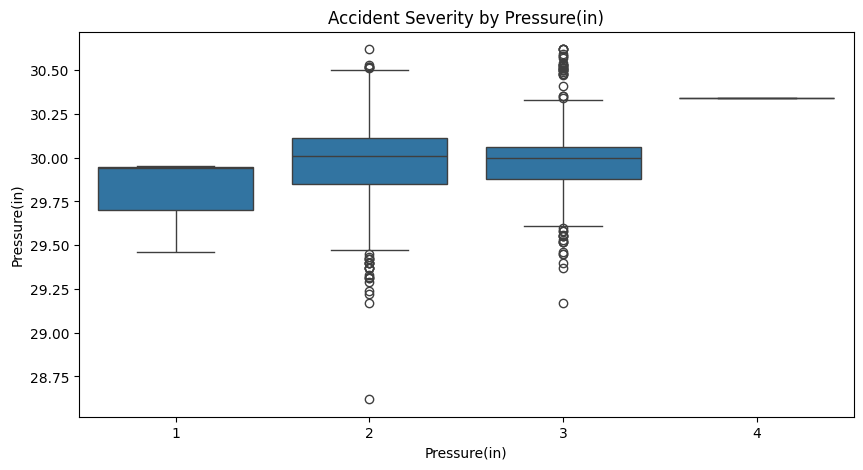

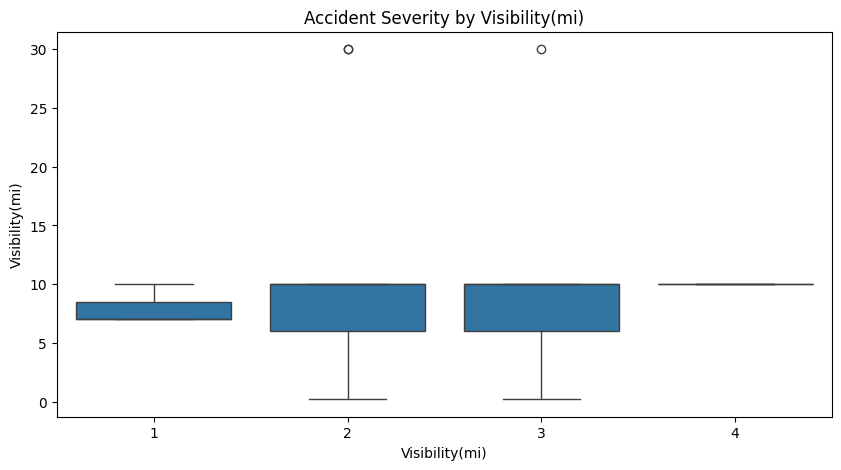

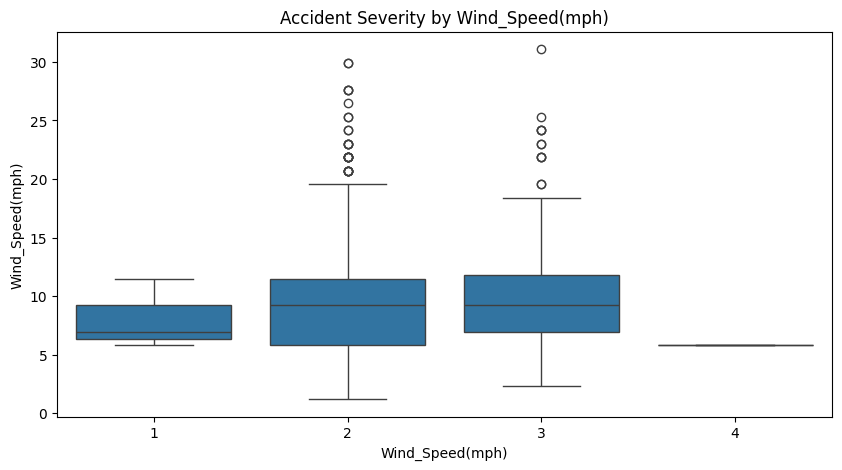

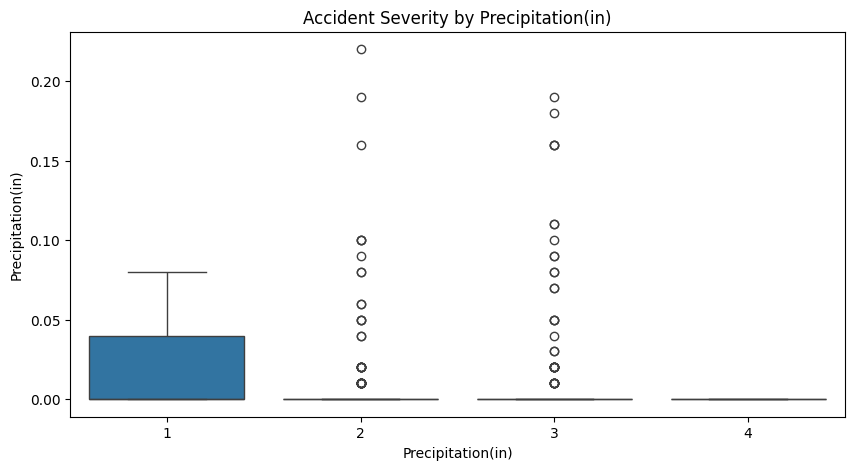

In [15]:
weather_conditions = [ 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for condition in weather_conditions:
    plt.figure(figsize=(10, 5))
    if df[condition].dtype == 'object':
        sns.countplot(x=condition, hue='Severity', data=df)
    else:
        sns.boxplot(x='Severity', y=condition, data=df)
    plt.title(f'Accident Severity by {condition}')
    plt.xlabel(condition)
    plt.ylabel('Count' if df[condition].dtype == 'object' else condition)
    plt.show()


In [16]:
# weather_conditions = ['Weather_Condition', 'Wind_Direction']
if 'Wind_Direction' in df.columns and 'Weather_Condition' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Wind_Direction', hue='Weather_Condition', data=df)
    plt.title('Count of Wind Directions by Weather Condition')
    plt.xlabel('Wind Direction')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()
else:
    print("One or both columns are missing from the DataFrame.")

One or both columns are missing from the DataFrame.


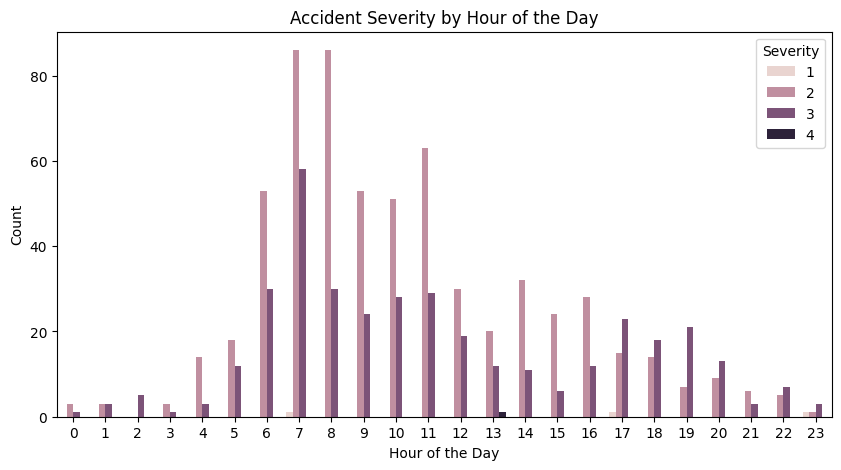

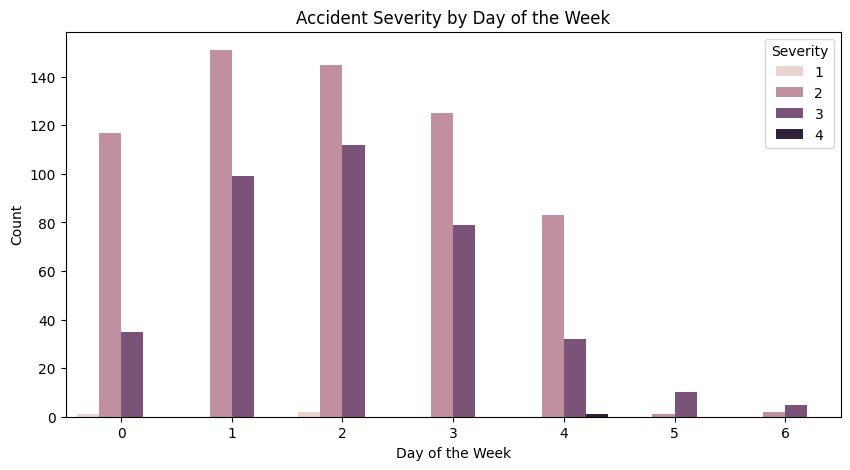

In [17]:
# Ensure Start_Time is in datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour and day of week from Start_Time
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek

# Plotting severity distribution by hour of the day
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', hue='Severity', data=df)
plt.title('Accident Severity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

# Plotting severity distribution by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_Week', hue='Severity', data=df)
plt.title('Accident Severity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


In [18]:
import folium
from folium.plugins import HeatMap

# Create a base map
base_map = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)

# Add a heat map layer
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(base_map)

# Save the map to an HTML file
base_map.save('accident_hotspots.html')


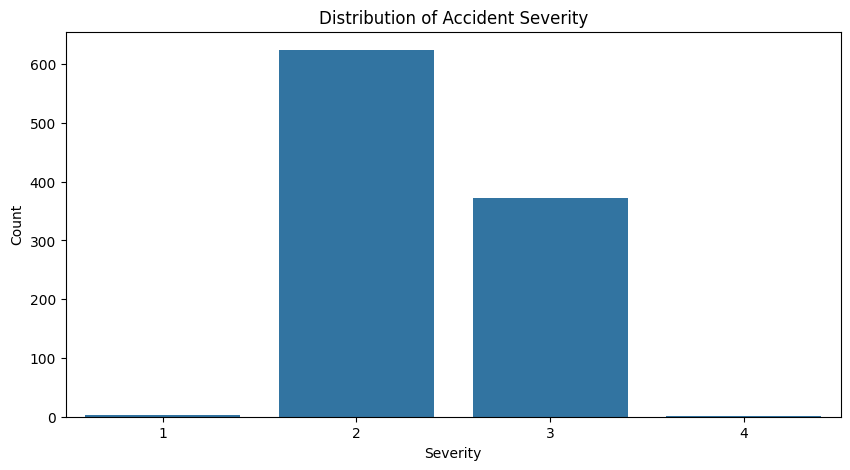

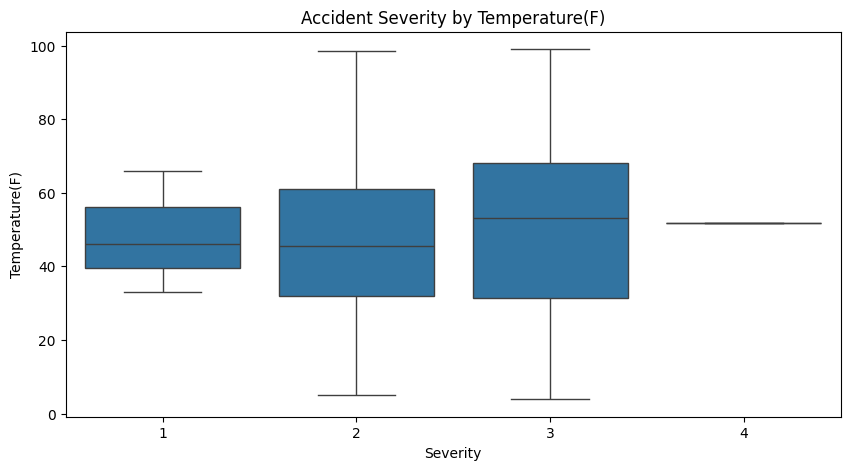

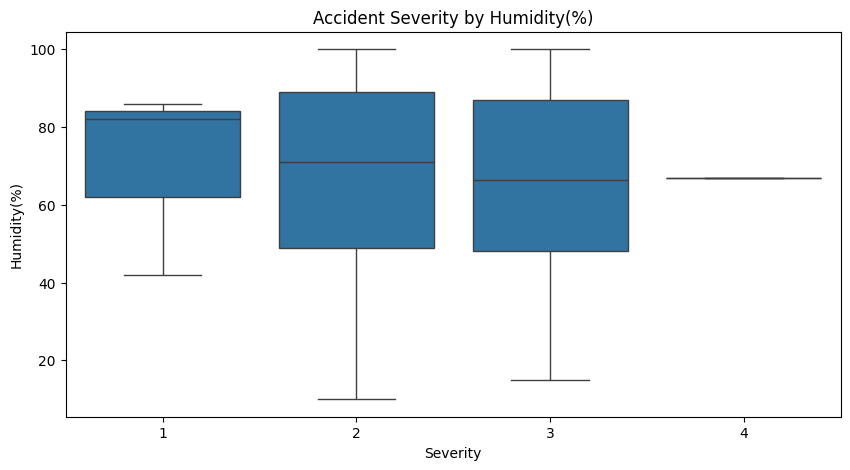

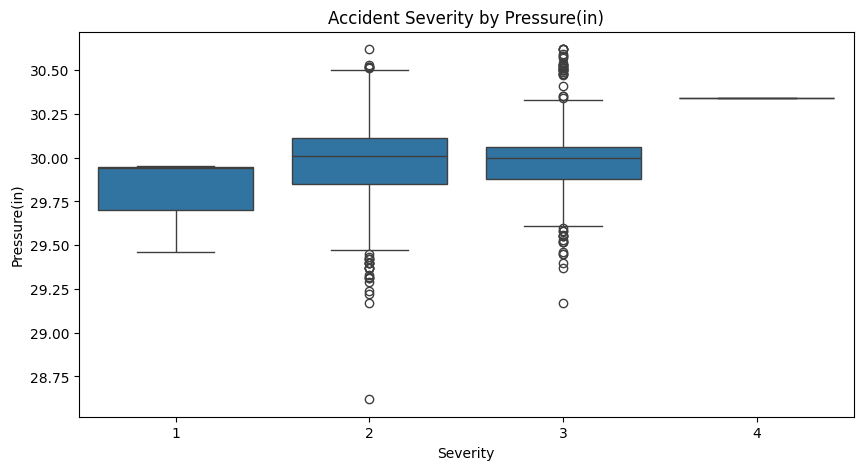

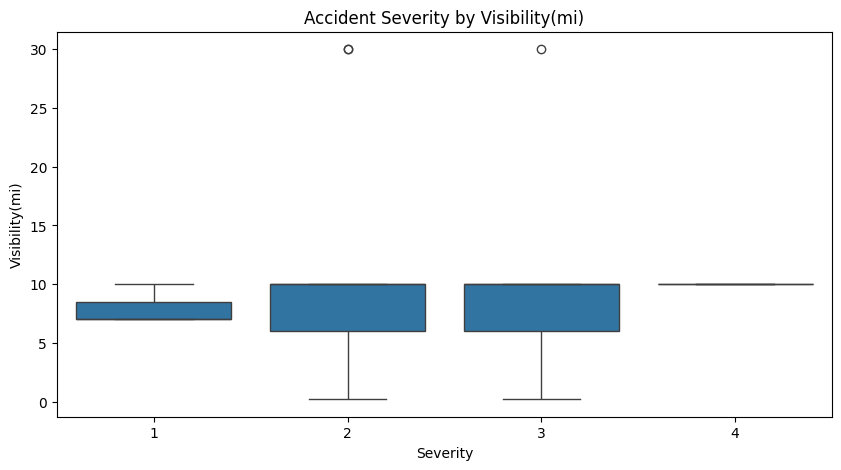

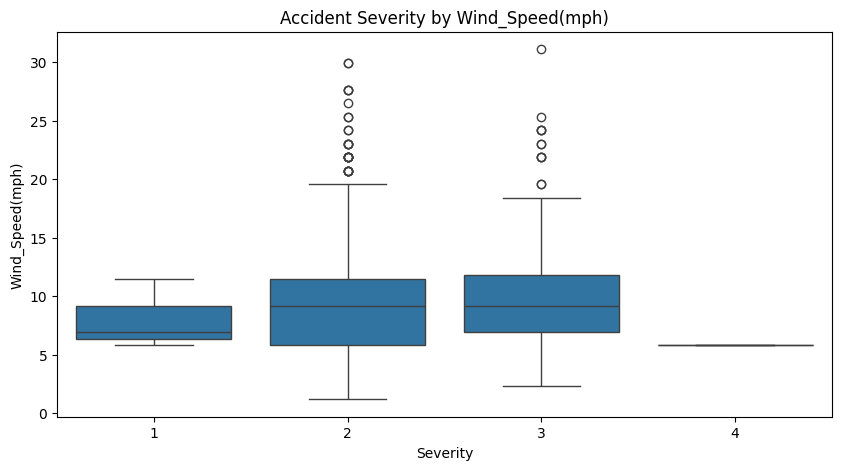

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

features_to_analyze = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

for feature in features_to_analyze:
    if feature in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='Severity', y=feature, data=df)
        plt.title(f'Accident Severity by {feature}')
        plt.xlabel('Severity')
        plt.ylabel(feature)
        plt.show()
